In [152]:
import pandas as pd
import matplotlib as plt
import numpy as np

df = pd.read_csv('retail_sales_dataset.csv')

### Persiapan Data
Langkah yang pertama saya lakukan adalah memastikan data siap dianalisis. Kode ini merupakan formatting tanggal agar sesuai dengan standar Python dan mengurutkan bulan dengan urutan yang benar agar tren yang dihasilkan nanti tidak berantakan.

In [153]:
# Formatting kolom date ke format yang benar
df['Date'] = pd.to_datetime(df['Date'])
df['Bulan'] = df['Date'].dt.month_name()

#Mengurutkan bulan sesuai kalender
list_bulan = ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December']

df['Bulan'] = pd.Categorical(df['Bulan'], categories=list_bulan, ordered=True)

### 1. Tren Pendapatan Bulanan
Saya ingin melihat kapan toko mendapatkan pendapatan tertinggi. Dengan memvisualisasikan data transaksi per bulan, kita bisa melihat pola bulan-bulan tertentu di mana penjualan meningkat maupun menurun.

<Axes: title={'center': 'Analisis pendapatan terbesar (Jan - Des)'}, xlabel='Bulan', ylabel='Total Terjual'>

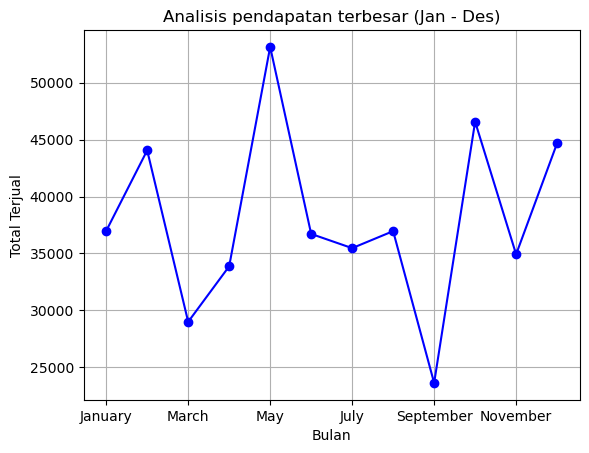

In [154]:
# Mencari tren bulan dengan pendapatan tertinggi
penjualan_tertinggi = df.groupby('Bulan', observed=False)['Total Amount'].sum()

# Visualisasi Tren Pendapatan Bulanan
penjualan_tertinggi.plot(kind='line',
                marker = 'o',
                title = 'Analisis pendapatan terbesar (Jan - Des)',
                ylabel = 'Total Terjual',
                xlabel = 'Bulan',
                grid=True,
                color = 'blue')

### 2. Performa Kategori Produk
Selanjutnya, saya menganalisis kategori produk mana yang menyumbang volume penjualan (Quantity) terbanyak. Hal ini penting untuk manajemen stok dan menentukan fokus promosi produk.

<Axes: title={'center': 'Kategori Produk dengan penjualan tertinggi'}, xlabel='Kategori Produk', ylabel='Jumalah terjual'>

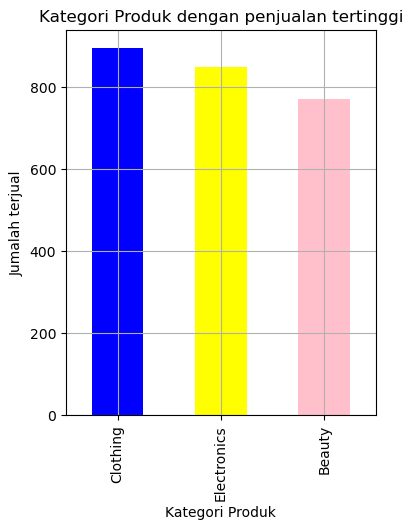

In [155]:
# Mencari kategori produk terlaris
kategori_produk_terlaris = df.groupby('Product Category')['Quantity'].sum()

# Urutkan nilai tertinggi
kategori_produk_terlaris.sort_values(ascending=False, inplace=True)

kategori_produk_terlaris.plot(kind = 'bar',
                              color = ['blue','yellow','pink'],
                              grid=True,
                              figsize = [4,5],
                             ylabel = 'Jumalah terjual',
                             xlabel = 'Kategori Produk',
                             title = 'Kategori Produk dengan penjualan tertinggi')

### 3. Analisis Demografi: Fokus pada Kategori unggulan
Setelah melihat tren penjualan secara umum, saya melakukan observasi lebih mendalam pada dua kategori yang paling menonjol, yaitu Clothing dan Electronics.

Tujuannya adalah untuk memvalidasi apakah lonjakan penjualan pada bulan-bulan tertentu didominasi oleh gender spesifik atau justru menyasar pasar yang lebih luas. Langkah ini penting untuk menentukan apakah strategi pemasaran harus tersegmentasi berdasarkan gender atau tetap menggunakan pendekatan universal.

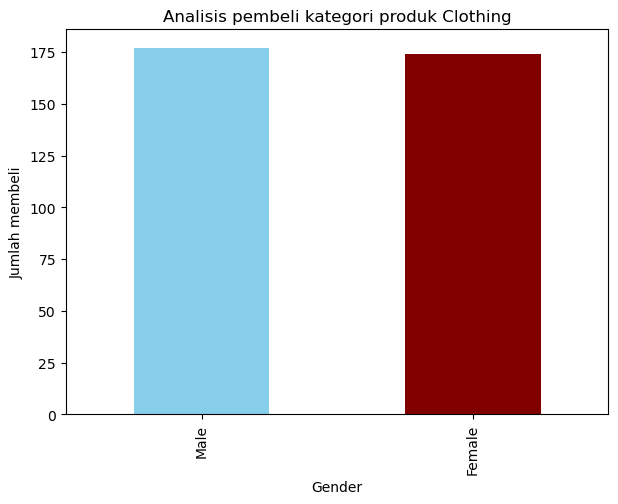

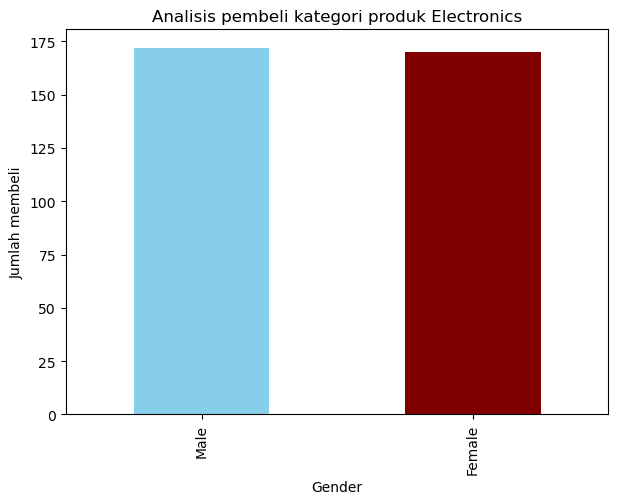

In [156]:
# Cek gender terbanyak dalam pembelian kategori produk(Clothing)
clothing_gender = df[df['Product Category'] == 'Clothing']['Gender'].value_counts()

# Cek proporsi gender khusus di kategori Electronics
electronics_gender = df[df['Product Category'] == 'Electronics']['Gender'].value_counts()

import seaborn as sns
import matplotlib.pyplot as plt

# Grafik Clothing
plt.figure(figsize=(7, 5))
clothing_gender.plot(kind='bar', color=['skyblue','maroon'], 
                     ylabel='Jumlah membeli', xlabel='Gender', 
                     title='Analisis pembeli kategori produk Clothing')
plt.show()

# Grafik Electronics
plt.figure(figsize=(7, 5)) # Buat kertas baru lagi
electronics_gender.plot(kind='bar', color=['skyblue','maroon'], 
                        ylabel='Jumlah membeli', xlabel='Gender', 
                        title='Analisis pembeli kategori produk Electronics')
plt.show()

### 4. Korelasi Bulan dan Kategori Produk
Terakhir, saya menggunakan **Heatmap** untuk melihat distribusi penjualan secara lebih detail. Grafik ini memetakan kategori produk apa yang paling laku di bulan-bulan tertentu, Saya melakukan analisis untuk melihat keterkaitan antara **Profil Gender** sehingga kita bisa melihat preferensi pelanggan dan siapa pembelinya yang berubah seiring waktu.

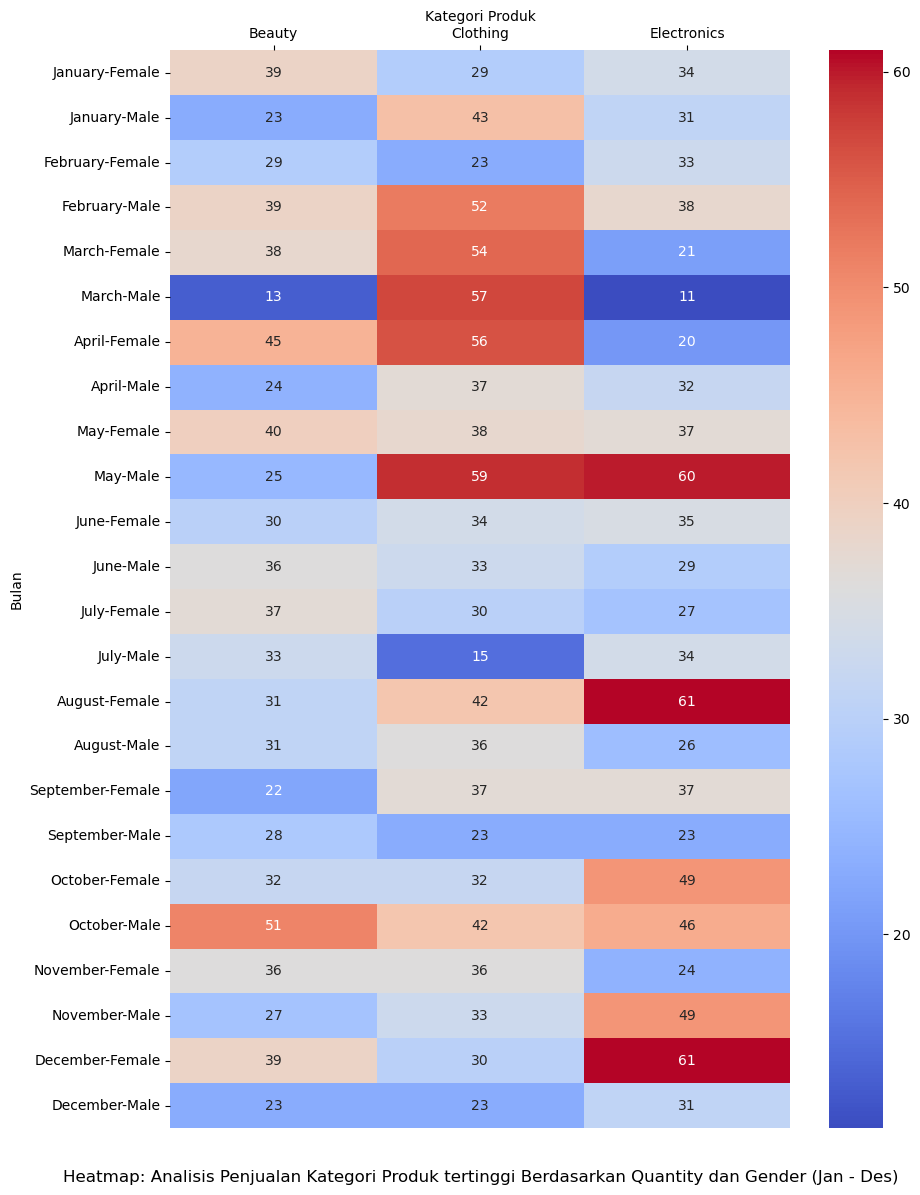

In [157]:
# Analisis product category penjualan tertinggi per bulan sekaligus berdsarkan gender
pivot_penjualan_tertinggi = df.pivot_table(index = ['Bulan','Gender'],
               columns='Product Category',
               values = 'Quantity',
               aggfunc = 'sum',
                observed=False)

plt.figure(figsize=(10, 14))

heatmap = sns.heatmap(pivot_penjualan_tertinggi, annot=True, cmap='coolwarm', fmt='.0f')
heatmap.xaxis.tick_top()
heatmap.xaxis.set_label_position('top')

plt.title('Heatmap: Analisis Penjualan Kategori Produk tertinggi Berdasarkan Quantity dan Gender (Jan - Des)', y = -0.05, pad=0.1)
plt.xlabel('Kategori Produk')
plt.ylabel('Bulan')
plt.show()



## Kesimpulan & Insight 

Berdasarkan seluruh rangkaian analisis saya di atas, berikut adalah temuan utama yang didapatkan:

1. **Siklus Belanja Produk Pakaian (Clothing):** Teramati adanya lonjakan volume penjualan yang konsisten pada kategori Clothing dalam rentang waktu Februari hingga April. Tren ini mengindikasikan adanya momentum belanja musiman di kuartal pertama yang perlu diantisipasi oleh tim operasional untuk memastikan ketersediaan stok pada periode tersebut.

2. **Anomali Tren Produk Elektronik:** Kategori Electronics menunjukkan pola unik dengan puncak aktivitas belanja yang terjadi pada bulan Mei, Agustus, November, dan Desember. Periode ini kemungkinan besar berkaitan dengan momen promosi besar atau hari libur nasional di akhir tahun.

3. **Demografi Konsumen yang Inklusif:** Satu temuan krusial adalah bahwa meskipun terjadi lonjakan di bulan-bulan tersebut, profil Gender konsumen tetap menunjukkan proporsi yang seimbang antara pria dan wanita. Hal ini membuktikan bahwa produk yang dipasarkan memiliki daya tarik universal, sehingga strategi pemasaran ke depannya tidak perlu terfragmentasi secara gender, melainkan lebih fokus pada optimasi waktu (momentum) promosi.


**Rekomendasi:** Memaksimalkan kampanye iklan pada kategori Clothing di awal tahun dan memperkuat stok produk Electronics menjelang akhir tahun tanpa membatasi segmentasi pada gender tertentu, demi menjaga stabilitas pertumbuhan penjualan dan memaksimalkan ROI (Return on Investment).